In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('D:/Downloads/iris.csv')

In [38]:
data.head()

,SepalLeangthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLeangthCM    150 non-null float64
SepalWidthCM      150 non-null float64
PetalLengthCM     150 non-null float64
PetalWidthCM      150 non-null float64
Species           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
data.describe()

,SepalLeangthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [44]:
data['Id'] = range(1, len(data) + 1)


In [45]:
data.head()

,SepalLeangthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Species,Id
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4.6,3.1,1.5,0.2,Iris-setosa,4
4,5.0,3.6,1.4,0.2,Iris-setosa,5


In [46]:
data.shape()

TypeError: 'tuple' object is not callable

In [47]:
tmp = data.drop('Id',axis = 1)

In [48]:
tmp.head()

,SepalLeangthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


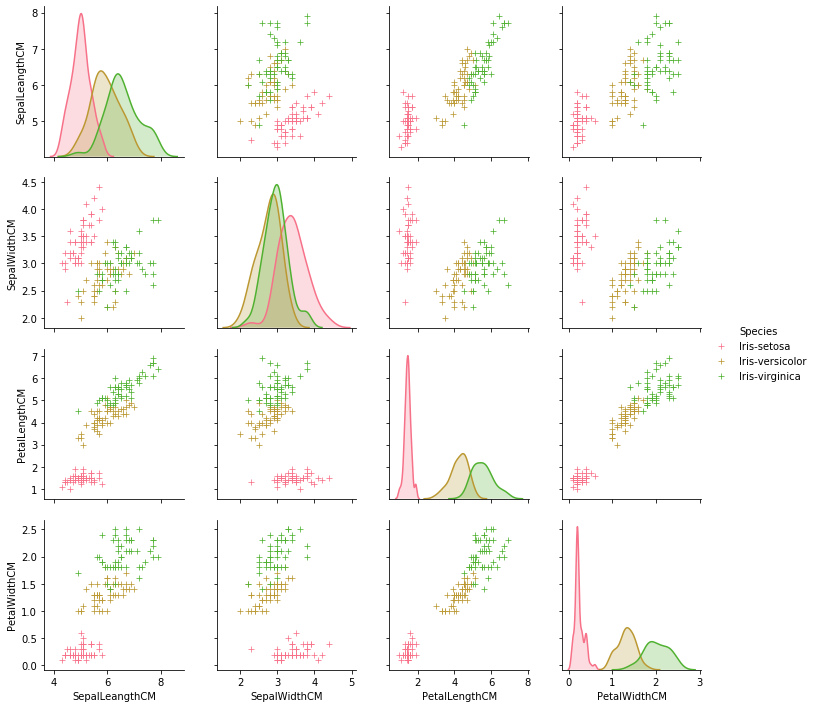

In [59]:
g = sns.pairplot(tmp,hue = 'Species', markers = '+')
plt.show()

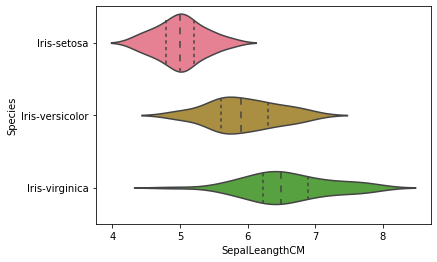

In [51]:
g = sns.violinplot(y ='Species',x ='SepalLeangthCM', data = data ,inner = 'quartile')
plt.show()

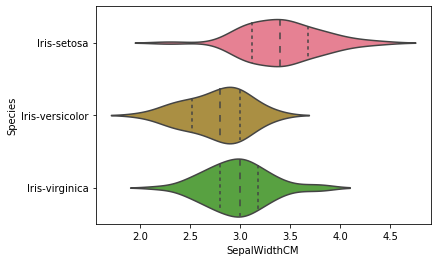

In [52]:
g = sns.violinplot(y ='Species',x ='SepalWidthCM', data = data ,inner = 'quartile')
plt.show()

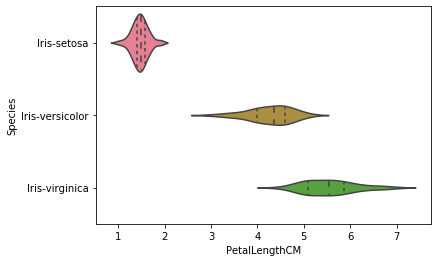

In [53]:
g = sns.violinplot(y ='Species',x ='PetalLengthCM', data = data ,inner = 'quartile')
plt.show()

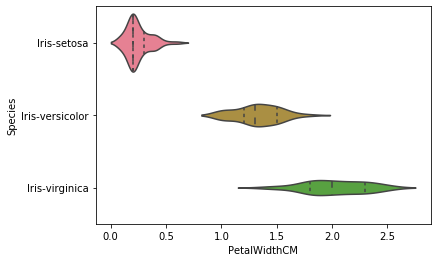

In [54]:
g = sns.violinplot(y ='Species',x ='PetalWidthCM', data = data ,inner = 'quartile')
plt.show()

In [55]:
X = data.drop(['Id','Species'],axis = 1)

In [56]:
y =data['Species']

In [57]:
x.head()

,SepalLeangthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


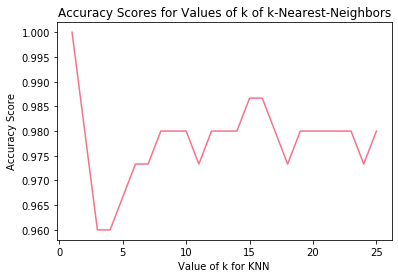

In [58]:
k_range = list(range(1,26))
scores =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y,y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [60]:
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


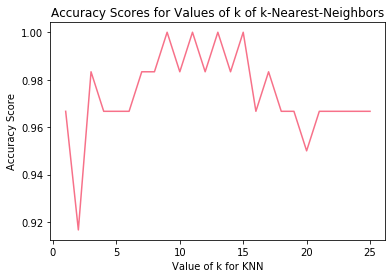

In [72]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [74]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X,y)

knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)